In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from pylab import rcParams
import pandas as pd


# Dataset
DF_RAW = pd.read_csv(
    "Wholesale customers data.csv",
    parse_dates=[1]
)


In [2]:
# Prepare dataset to use.
display(DF_RAW.head())
display(DF_RAW.shape)

print(
    f'Missing values check:\n{DF_RAW.isnull().sum()}\n'
)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)

Missing values check:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64



In [3]:
channel_values = DF_RAW['Channel'].value_counts()
region_values = DF_RAW['Region'].value_counts()

print(f'Channel labels:\n{channel_values}\n')
print(f'Region labels:\n{region_values}')

Channel labels:
1    298
2    142
Name: Channel, dtype: int64

Region labels:
3    316
1     77
2     47
Name: Region, dtype: int64


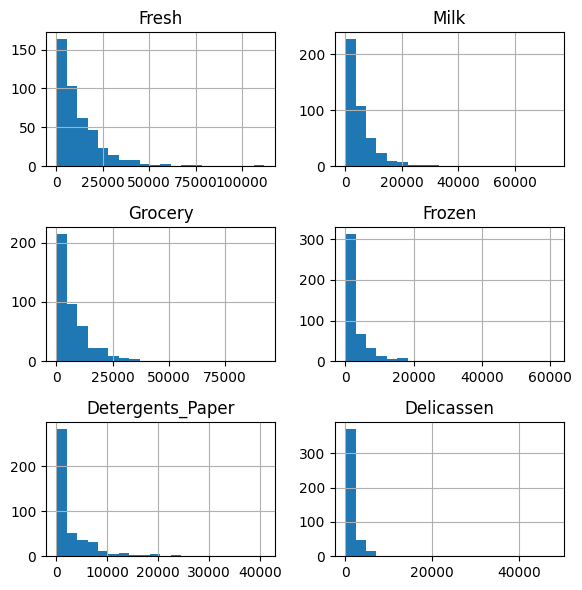

In [4]:
df_basic = DF_RAW.drop(
    ['Channel', 'Region'],
    axis=1
)

# Items histogram display to be analyzed.
rcParams['figure.figsize'] = (6, 6)
df_basic.hist(bins=20)
plt.tight_layout()
plt.show()